In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import WRCP_ALS3 as wrcp
from general_functions import sqrt_err_relative, check_coo_tensor, gen_coo_tensor

In [4]:
%%time
init_shape = (10, 10, 10)
coo, vals = gen_coo_tensor(init_shape, density=0.02)
assert check_coo_tensor(coo)!= "Bad"

max_iter = 12
rank = 20

a, b, c, _ = wrcp.wrcp_als3(
    coo,
    vals,
    init_shape,
    rank=rank,
    l2=0.25,
    max_iter=max_iter
)
rerr = sqrt_err_relative(coo, vals, init_shape, a, b, c)
print(rerr)

iterations over
2.3527001644242005
CPU times: user 13.4 ms, sys: 62 µs, total: 13.4 ms
Wall time: 13 ms


In [5]:
inds_list = pickle.load(open('../wikidata_tensors/fb_list.pcl', 'rb'))
ind_to_entity = pickle.load(open('../wikidata_tensors/fb_idx2ent.pcl', 'rb'))
ind_to_rel = pickle.load(open('../wikidata_tensors/fb_idx2rel.pcl', 'rb'))

In [6]:
values = [1] * len(inds_list)
values = np.array(values, dtype=np.float64)

coords = np.array(inds_list, dtype=np.int32)
nnz = len(inds_list)
data_shape = (14242, 1182, 14242)

In [7]:
max_iter = 10
rank = 50
l2 = 0.5 

In [8]:
%%time
a, b, c, err_arr = wrcp.wrcp_als3(
    coords,
    values,
    data_shape,
    rank=rank,
    l2=l2,
    max_iter=max_iter
)

iterations over
CPU times: user 12min 2s, sys: 1.54 s, total: 12min 4s
Wall time: 12min 1s


In [9]:
rerr = sqrt_err_relative(
    coords,
    values,
    data_shape,
    a,
    b,
    c,
)
print(f"Relative error = {rerr}")

Relative error = 20.972680669083612


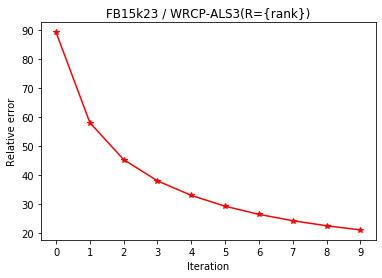

In [10]:
plt.xlabel("Iteration")
plt.ylabel("Relative error")
plt.title("FB15k23 / WRCP-ALS3(R={rank})")
plt.xticks(np.arange(max_iter))
plt.plot(np.arange(max_iter), err_arr[:max_iter], 'r-*')